In [1]:
#!pip install wordcloud
#!pip install nltk

In [2]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

## Data analysis

In [3]:
df = pd.read_csv('./blogtext.csv')
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [4]:
df = df.drop(columns=['id', 'date', 'sign']) #deleting unnessesary columns
df

,gender,age,topic,text
0,male,15,Student,"Info has been found (+/- 100 pages,..."
1,male,15,Student,These are the team members: Drewe...
2,male,15,Student,In het kader van kernfusie op aarde...
3,male,15,Student,testing!!! testing!!!
4,male,33,InvestmentBanking,Thanks to Yahoo!'s Toolbar I can ...
...,...,...,...,...
681279,male,23,Student,"Dear Susan, I could write some really ..."
681280,male,23,Student,"Dear Susan, 'I have the second yeast i..."
681281,male,23,Student,"Dear Susan, Your 'boyfriend' is fuckin..."
681282,male,23,Student,"Dear Susan: Just to clarify, I am as..."


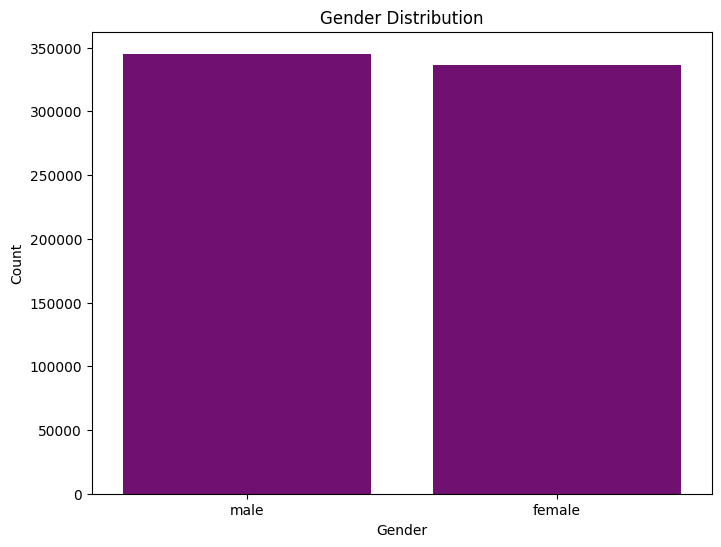

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', color='purple')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

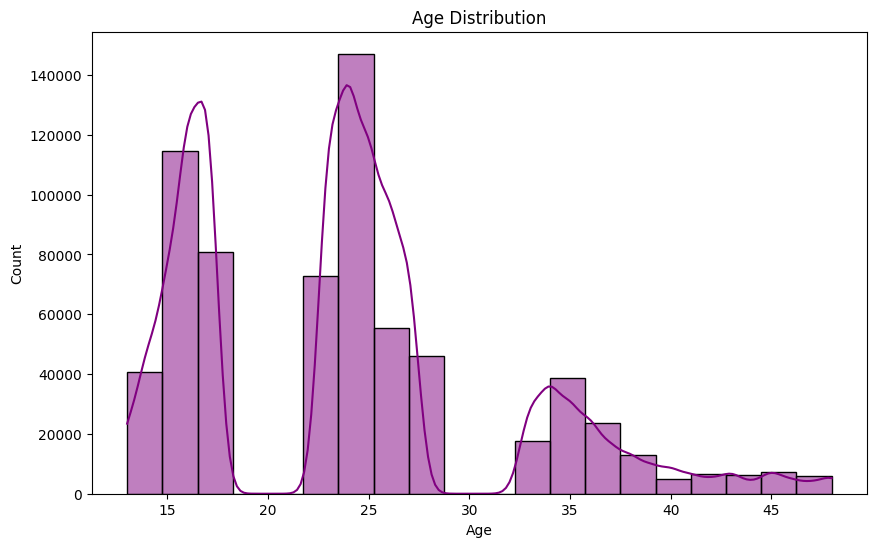

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20, kde=True, color='purple')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [7]:
# def plot_top_words(corpus, title, n=20):
#     vectorizer = CountVectorizer(stop_words='english', max_features=1000)
#     X = vectorizer.fit_transform(corpus)
#     word_counts = X.sum(axis=0).A1
#     words = vectorizer.get_feature_names_out()
    
#     word_freq = pd.DataFrame({'word': words, 'count': word_counts})
#     top_words = word_freq.nlargest(n, 'count')
    
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x='count', y='word', data=top_words, palette='flare')
#     plt.title(title)
#     plt.xlabel('Count')
#     plt.ylabel('Word')
#     plt.show()

# # Separate the texts by gender
# male_texts = df[df['gender'] == 'male']['clean_text']
# female_texts = df[df['gender'] == 'female']['clean_text']

# # Plot top words for male bloggers
# plot_top_words(male_texts, 'Top Words for Male Bloggers')

# # Plot top words for female bloggers
# plot_top_words(female_texts, 'Top Words for Female Bloggers')

## Data preprocessing

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

def stopwords_removal(text):
    new_words = word_tokenize(text)
    new_filtered_words = [
        #lemmatizer.lemmatize(word.lower()) for word in new_words if word.lower() not in stopwords.words('english')
        word for word in new_words if word.lower() not in stopwords.words('english')
    ]

    return ' '.join(new_filtered_words)

In [9]:
df = df.sample(n=len(df))
df_short = df[:30000]

In [10]:
def categorize_age(age):
    if age < 20:
        return 0  # less than 20
    elif 20 <= age <= 30:
        return 1  # 20-30
    else:
        return 2  # more than 30

df_short['age_category'] = df_short['age'].apply(categorize_age)


C:\Users\Ciri\AppData\Local\Temp\ipykernel_64576\3528562886.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['age_category'] = df_short['age'].apply(categorize_age)


In [11]:
def text_prerocess(text): #10 minutes
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\W+', ' ', text)
    text = text.lower()
    text = re.sub(r'nbsp', '', text)
    text = re.sub(r'urllink', '', text)
    text = re.sub(r'im', 'i am', text)
        
    return text


df_short['clean_text'] = df_short['text'].apply(text_prerocess)
df_short['clean_topic'] = df_short['topic'].apply(text_prerocess)

df_short['clean_topic'] = df_short['clean_topic'].apply(stopwords_removal)
df_short['clean_text'] = df_short['clean_text'].apply(stopwords_removal)

df_short['combined_text'] = df_short['clean_text'] + ' ' + df_short['clean_topic']

df_short['gender_bi'] = df_short['gender'].map({'male': 1, 'female': 0})

x_train, x_test, y_train, y_test = train_test_split(df_short['combined_text'], df_short[['age_category','gender_bi']], test_size=0.2, random_state=42)

C:\Users\Ciri\AppData\Local\Temp\ipykernel_64576\945632559.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['clean_text'] = df_short['text'].apply(text_prerocess)
C:\Users\Ciri\AppData\Local\Temp\ipykernel_64576\945632559.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['clean_topic'] = df_short['topic'].apply(text_prerocess)
C:\Users\Ciri\AppData\Local\Temp\ipykernel_64576\945632559.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [12]:
# #only part of dataset cause it's too big
# x_train = x_train[:10000] 
# x_test = x_test[:1000]
# y_train = y_train[:10000] 
# y_test = y_test[:1000]

In [13]:
x_train[:15]

430807    every morning everyone wakes bad mood tired kn...
257802    migraine migraine medicine empty stomach wakin...
581562    today tried finish dish vegetable normally lik...
184042    reminded heterosexual fiend particularly attra...
671814    dear xfm even realm white male indie rock bett...
583908    got home swi amming davis davis bro kenneth da...
36310     story msnbc msn com ulti amate computer earlie...
332246    go http www amnestyusa org annualreport index ...
179000    picture one first subjects anyone knows name c...
78374     well started bang literally thirty minutes tri...
327612    may bagong isyu ang tinig com asteeg talaga ka...
146434    weebls stuff forums weebl bob beginners noobs ...
604587    say kyrie eleison people responsible act barba...
289291    dear diary tomorrow distributing phamphlets co...
579269                                           technology
Name: combined_text, dtype: object

## Model training

In [35]:
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

In [36]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

rf_age_category = RandomForestClassifier(n_estimators=100, random_state=42)
rf_age_category.fit(x_train_tfidf, y_train['age_category'])

age_category_score = rf_age_category.score(x_test_tfidf, y_test['age_category'])
print(f'Random Forest age category prediction accuracy: {age_category_score}')

Random Forest age category prediction accuracy: 0.6388333333333334


In [37]:
age_category_predictions = rf_age_category.predict(x_test_tfidf)
print(classification_report(y_test['age_category'], age_category_predictions))

importances_age_category = rf_age_category.feature_importances_
indices_age_category = np.argsort(importances_age_category)[::-1]

top_n = 15
top_features_age_category = [vectorizer.get_feature_names_out()[i] for i in indices_age_category[:top_n]]
print(f'Top {top_n} features for age category prediction: {top_features_age_category}')

              precision    recall  f1-score   support

           0       0.76      0.69      0.72      2043
           1       0.58      0.84      0.69      2791
           2       0.60      0.06      0.11      1166

    accuracy                           0.64      6000
   macro avg       0.65      0.53      0.51      6000
weighted avg       0.65      0.64      0.59      6000

Top 15 features for age category prediction: ['student', 'indunk', 'technology', 'school', 'dont', 'engineering', 'well', 'work', 'go', 'lol', 'haha', 'like', 'internet', 'na', 'arts']


## Gender

In [38]:
rf_gender = RandomForestClassifier(n_estimators=100, random_state=42)
rf_gender.fit(x_train_tfidf, y_train['gender_bi'])

rf_gender.score(x_test_tfidf, y_test['gender_bi'])

gender_predictions = rf_gender.predict(x_test_tfidf)
print(classification_report(y_test['gender_bi'], gender_predictions))

              precision    recall  f1-score   support

           0       0.63      0.72      0.67      2986
           1       0.68      0.58      0.62      3014

    accuracy                           0.65      6000
   macro avg       0.65      0.65      0.65      6000
weighted avg       0.65      0.65      0.65      6000



In [39]:
importances_gender = rf_gender.feature_importances_
indices_gender = np.argsort(importances_gender)[::-1]

top_features_gender = [vectorizer.get_feature_names_out()[i] for i in indices_gender[:top_n]]
print(f'Top {top_n} features for gender prediction: {top_features_gender}')

Top 15 features for gender prediction: ['technology', 'indunk', 'student', 'love', 'internet', 'arts', 'one', 'know', 'like', 'really', 'hi', 'go', 'happy', 'mom', 'want']


## Results analysis

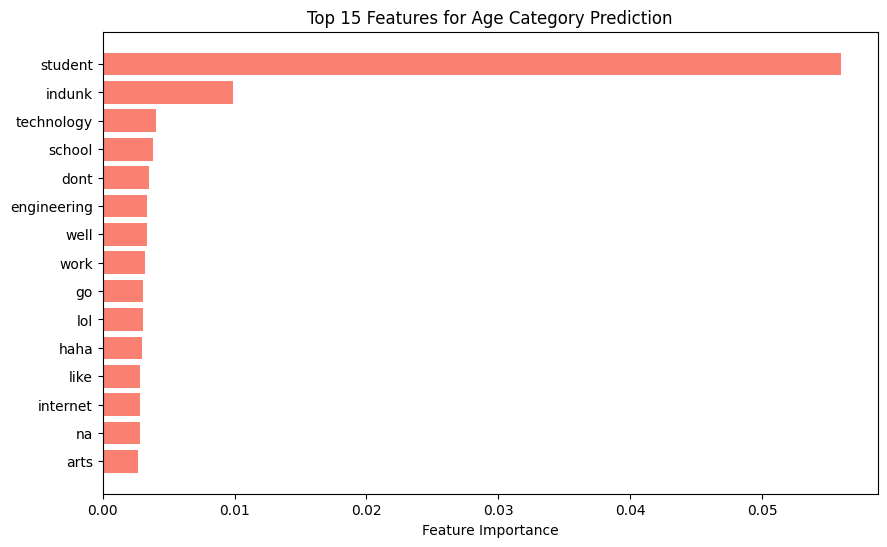

In [19]:
top_importances_age_category = importances_age_category[indices_age_category[:top_n]]

plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_importances_age_category, align='center', color='salmon')
plt.yticks(range(top_n), top_features_age_category)
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Top 15 Features for Age Category Prediction')
plt.show()

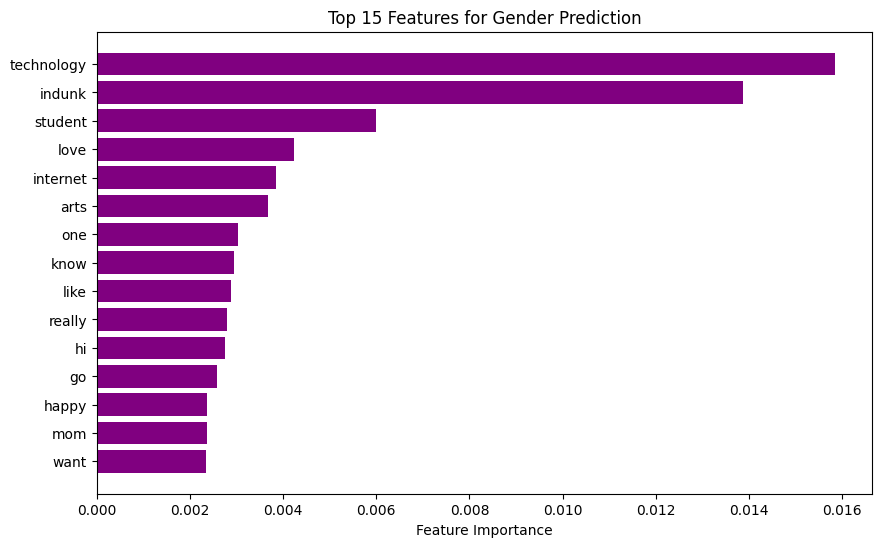

In [20]:
top_importances_gender = importances_gender[indices_gender[:top_n]]

plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_importances_gender, align='center', color='purple')
plt.yticks(range(top_n), top_features_gender)
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Top 15 Features for Gender Prediction')
plt.show()

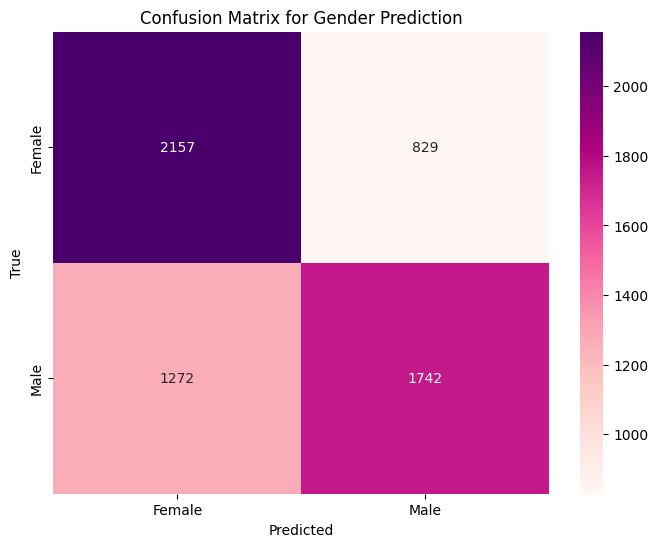

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predicted_genders = rf_gender.predict(x_test_tfidf)

cm = confusion_matrix(y_test['gender_bi'], predicted_genders)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.title('Confusion Matrix for Gender Prediction')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


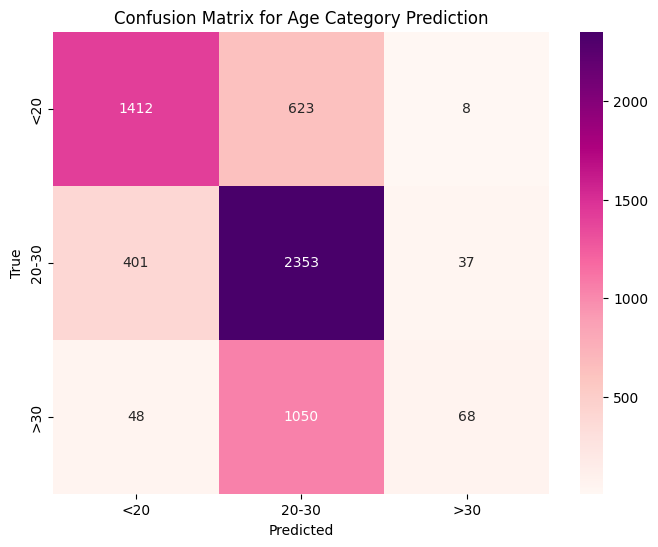

In [22]:
cm_age_category = confusion_matrix(y_test['age_category'], age_category_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_age_category, annot=True, fmt='d', cmap='RdPu', xticklabels=['<20', '20-30', '>30'], yticklabels=['<20', '20-30', '>30'])
plt.title('Confusion Matrix for Age Category Prediction')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


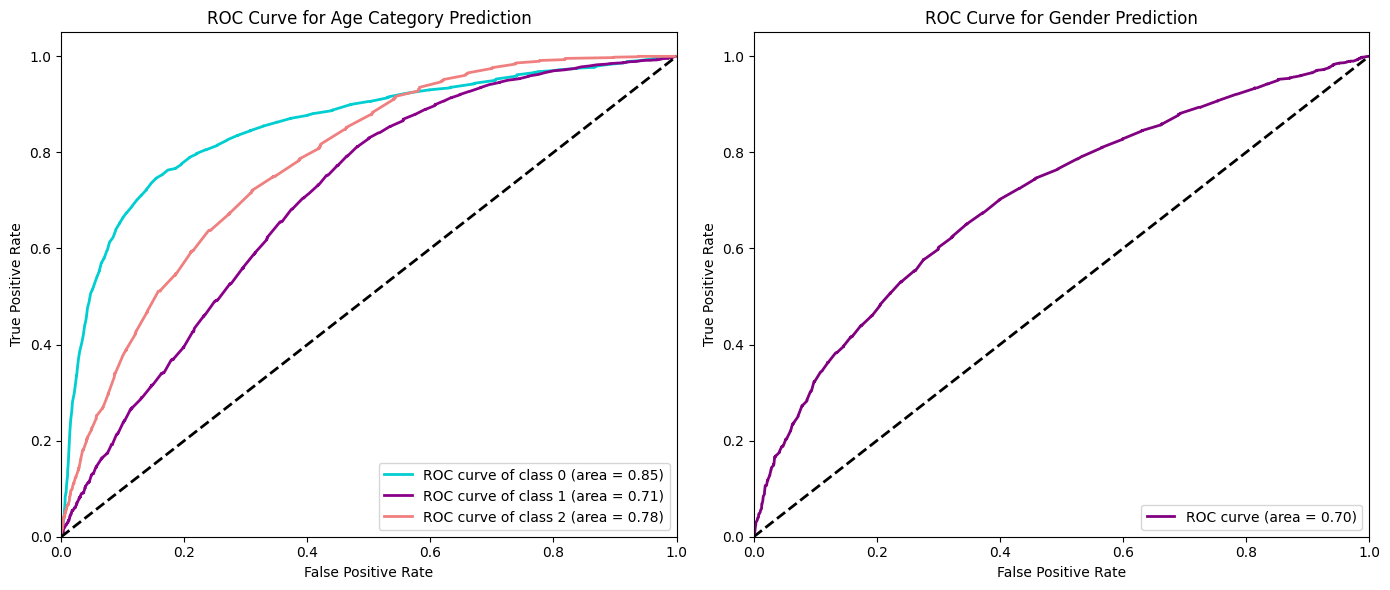

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

y_test_binarized = label_binarize(y_test['age_category'], classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], rf_age_category.predict_proba(x_test_tfidf)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_gender, tpr_gender, _ = roc_curve(y_test['gender_bi'], rf_gender.predict_proba(x_test_tfidf)[:, 1])
roc_auc_gender = auc(fpr_gender, tpr_gender)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

colors = cycle(['darkturquoise', 'darkmagenta', 'lightcoral'])
for i, color in zip(range(n_classes), colors):
    ax1.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

ax1.plot([0, 1], [0, 1], 'k--', lw=2)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve for Age Category Prediction')
ax1.legend(loc="lower right")

ax2.plot(fpr_gender, tpr_gender, color='purple', lw=2, label='ROC curve (area = {0:0.2f})'.format(roc_auc_gender))
ax2.plot([0, 1], [0, 1], 'k--', lw=2)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve for Gender Prediction')
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

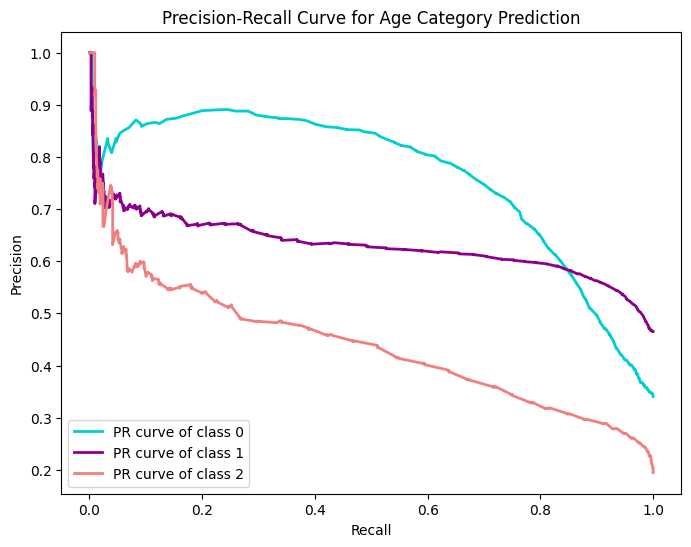

In [24]:
from sklearn.metrics import precision_recall_curve

precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], rf_age_category.predict_proba(x_test_tfidf)[:, i])

plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2, label='PR curve of class {0}'.format(i))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Age Category Prediction')
plt.legend(loc="lower left")
plt.show()


C:\Users\Ciri\AppData\Local\Temp\ipykernel_64576\1156184173.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test['age_category'], palette='Blues', alpha=0.5, label='True Age Categories')
C:\Users\Ciri\AppData\Local\Temp\ipykernel_64576\1156184173.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=age_category_predictions, palette='Reds', alpha=0.5, label='Predicted Age Categories')


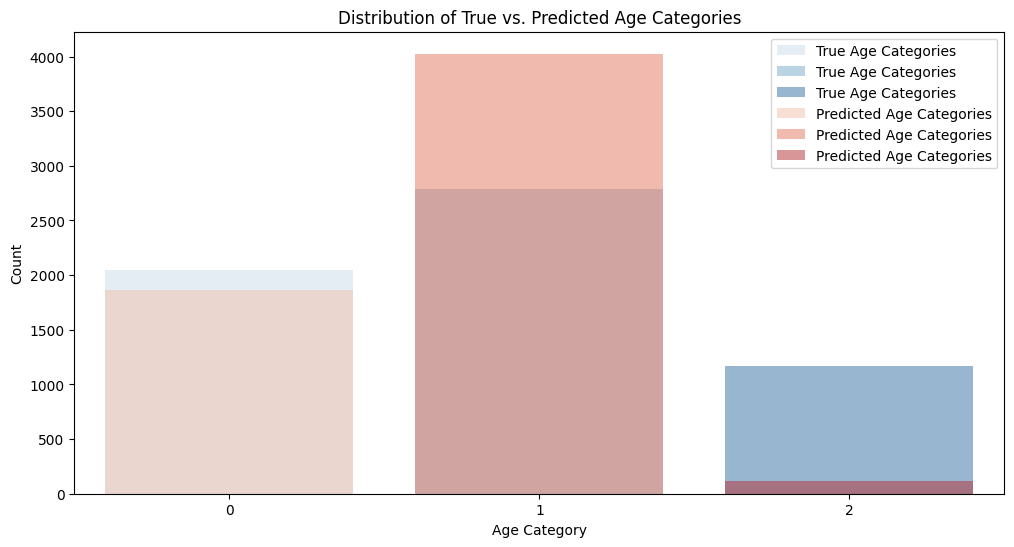

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(x=y_test['age_category'], palette='Blues', alpha=0.5, label='True Age Categories')
sns.countplot(x=age_category_predictions, palette='Reds', alpha=0.5, label='Predicted Age Categories')
plt.title('Distribution of True vs. Predicted Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend()
plt.show()


In [26]:
def decategorize(age:list, gender:list):
    res = []
    if age == 0:
        res.append(['less than 20'])
    elif age == 1:
        res.append(['20-30'])
    else:
        res.append(['more than 30'])

    if gender == 0:
        res.append(['female'])
    else:
        res.append(['male'])
    
    return res


## Book data

In [27]:
book_train = pd.read_csv('train_book.csv')

In [28]:
book_train

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP
19575,id08973,The lids clenched themselves together as if in...,EAP
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP
19577,id17513,"For an item of news like this, it strikes us i...",EAP


In [29]:
book_train.drop(columns=['id'])

# defining authors gender
def categorize_gender(gender):
    if gender == 'EAP' or gender == 'HPL':
        return 1  # male
    else:
        return 0  # female

# Apply age categorization
book_train['gender'] = book_train['author'].apply(categorize_gender)

book_train['text'].apply(text_prerocess)
book_train['text'].apply(stopwords_removal)

x_train_book, x_test_book, y_train_book, y_test_book = train_test_split(book_train['text'], book_train[['gender']], test_size=0.2, random_state=42)

In [30]:
x_train_b = vectorizer.fit_transform(x_train_book)
x_test_b = vectorizer.transform(x_test_book)

In [31]:
rf_author = RandomForestClassifier(n_estimators=100, random_state=42)
rf_author.fit(x_train_b, y_train_book)

rf_author.score(x_test_b, y_test_book)

c:\Users\Ciri\.pyenv\pyenv-win\versions\3.11.7\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8051583248212462

In [32]:
print('Old model on old data: ', rf_gender.score(x_test_tfidf, y_test['gender_bi']))
print('Old model on new data: ', rf_gender.score(x_test_b, y_test_book))
print('New model on new data: ', rf_author.score(x_test_b, y_test_book))
print('New model on old data: ', rf_author.score(x_test_tfidf, y_test['gender_bi']))

Old model on old data:  0.6498333333333334
Old model on new data:  0.6085291113381001
New model on new data:  0.8051583248212462
New model on old data:  0.5076666666666667


# For user

In [60]:
#please enter your text below:
#your_text = 'I would love to go to the gallery with you after university! I heard they are exhibiting the most famous paintings of Monet, he is my favourite painter, i am so excited!' #me
#your_text = 'But actually I can just dye my hair, wear my tights and clothes with crazy colors, and bam, ready' #me
#your_text = 'I\'m still a bit mad at myself for not fixing my bike correctly' #male 22
#your_text = 'During the last week, I was busy with university things, volunteering project tasks and job I am doing for living. I am overwhelmed and exhausted, I would like to get enough sleep' #female 21
#your_text = 'I finnaly found satated CAP for GPT-4o. Interesting that new technology has bigger cap than old one, but new one is also better.' #male 21
your_text = 'studies But actually I can just school dye my hair, wear my tights and clothes with crazy colors, and bam, ready'

In [61]:
#Now run this cell and it will give you result

text = text_prerocess(your_text)
text = stopwords_removal(text)

text = pd.Series(your_text)

text = vectorizer.transform(text)

pred_age = rf_age_category.predict(text)
pred_gen = rf_gender.predict(text)

result = decategorize(pred_age, pred_gen)
print(f'The author\'s age is in this range: {result[0]}\nAuthor\'s gender: {result[1]}')

The author's age is in this range: ['less than 20']
Author's gender: ['female']
